In [15]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi import NewsApiClient
from datetime import datetime, timedelta
import numpy as np
from numpy.random import seed
seed(1)
import requests
from tensorflow import random
random.set_seed(2)
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
load_dotenv()

True

In [17]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
#print(alpaca_api_key)

In [18]:
#15Min interval
timeframe = "1D"
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()
#today = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()
ticker = ["PYPL", "SQ", "AFRM", "MELI"]
fintech_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
fintech_ticker.dropna(inplace=True)
fintech_ticker.head(5)
#apple_ticker.dropna(inplace=True)

AFRM                                        \
                              open     high     low    close      volume   
time                                                                       
2021-01-13 00:00:00-05:00   90.900  103.000   90.01   97.010  24984325.0   
2021-01-14 00:00:00-05:00  103.500  137.980  101.00  114.400  20358777.0   
2021-01-15 00:00:00-05:00  123.054  127.240  107.00  116.700   8033257.0   
2021-01-19 00:00:00-05:00  117.000  117.675  108.00  110.875   3116358.0   
2021-01-20 00:00:00-05:00  110.000  112.000  103.25  107.150   3504314.0   

                              MELI                                           \
                              open       high       low     close    volume   
time                                                                          
2021-01-13 00:00:00-05:00  1823.00  1830.0000  1766.685  1797.165  453625.0   
2021-01-14 00:00:00-05:00  1814.00  1889.6200  1814.000  1852.520  491020.0   
2021-01-15 00:00:00-05:00  1860.01  1877.1091  1805.460  1856.340  478130.0   
2021-01-19 00:00:00-05:00  1888.17  1938.1699  1861.000  1915.700  590186.0   
2021-01-20 00:00:00-05:00  1960.00  1991.8800  1929.520  1986.000  574762.0   

                             PYPL                                         \
                             open      high       low   close     volume   
time                                                                       
2021-01-13 00:00:00-05:00  236.57  247.4400  236.5400  244.90  6419870.0   
2021-01-14 00:00:00-05:00  246.87  249.8500  241.5400  242.01  5757075.0   
2021-01-15 00:00:00-05:00  242.25  244.5632  235.0341  239.79  6600442.0   
2021-01-19 00:00:00-05:00  243.30  248.7400  241.0000  247.24  5690793.0   
2021-01-20 00:00:00-05:00  248.85  249.6500  244.1400  244.19  5068278.0   

                               SQ                                        
                             open      high     low   close      volume  
time                                                                     
2021-01-13 00:00:00-05:00  228.95  234.8213  226.80  230.94  14553101.0  
2021-01-14 00:00:00-05:00  233.90  238.7600  229.59  232.71   6502923.0  
2021-01-15 00:00:00-05:00  233.63  236.4300  225.58  227.65   6344926.0  
2021-01-19 00:00:00-05:00  231.07  231.5900  223.25  227.25   6347656.0  
2021-01-20 00:00:00-05:00  230.12  230.8800  225.50  226.65   5379761.0

In [19]:
fintech_df = pd.DataFrame()
fintech_df["PayPal"] = fintech_ticker["PYPL"]["close"]
fintech_df["Square"] = fintech_ticker["SQ"]["close"]
fintech_df["Affirm"] = fintech_ticker["AFRM"]["close"]
fintech_df["Mercadolibre"] = fintech_ticker["MELI"]["close"]
#fintech_df["Johnson&Johnson"] = nasdaq_ticker["JNJ"]["close"]
fintech_df.index = fintech_df.index.date 
fintech_returns = fintech_df.pct_change().dropna()
#fintech_df.dropna(inplace=True)
fintech_returns.head()

,PayPal,Square,Affirm,Mercadolibre
2021-01-14,-0.011801,0.007664,0.179260,0.030801
2021-01-15,-0.009173,-0.021744,0.020105,0.002062
2021-01-19,0.031069,-0.001757,-0.049914,0.031977
2021-01-20,-0.012336,-0.002640,-0.033596,0.036697
2021-01-21,0.018224,-0.031017,0.017172,-0.021203


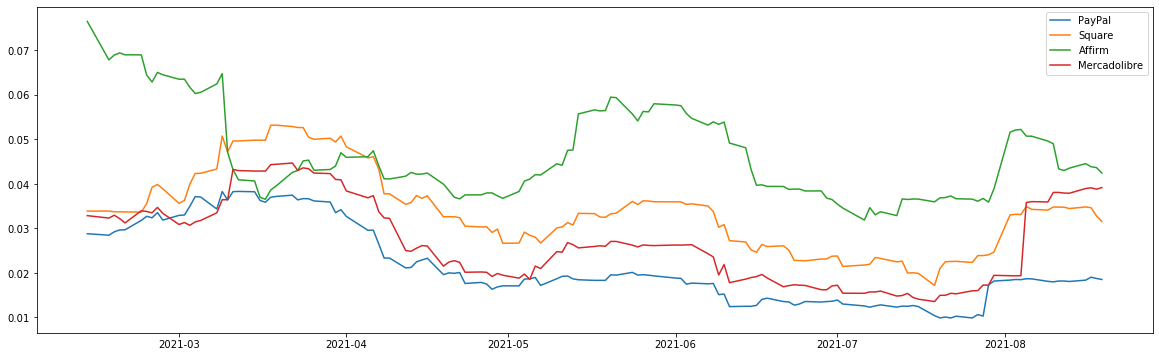

In [25]:
fintech_std = fintech_returns.rolling(window=21).std()
fintech_std.plot(figsize=(20,6))